# [Dataset](https://zenodo.org/records/5516552)

Data included in these two datasets are 10-minute data generated from six wind turbines and three met masts and are arranged in six files, each of which is associated with a turbine. The six turbines are named WT1 through WT6, respectively.  The layout of the turbines and the met masts is shown in Fig. 5.6 of the Data Science for Wind Energy book. On the offshore wind farm, all seven environmental variables as mentioned above are available, namely x =(V, D, rho, H, I, Sa, Sb), whereas on the inland wind farm, the humidity measurements are not available, nor is the above-hub wind shear, meaning that x =(V, D, rho, I, Sb). Variables in x were measured by sensors on the met mast, whereas y was measured at the wind turbines. Each met mast has two wind turbines associated with it, meaning that the x's measured at a met mast are paired with the y's of two associated turbines. For WT1 and WT2, the data were collected from July 30, 2010 through July 31, 2011 and for WT3 and WT4, the data were collected from April 29, 2010 through April 30, 2011. For WT5 and WT6, the data were collected from January 1, 2009 through December 31, 2009.

Meaning of variables; 
- V: wind speed;
- D: wind direction;
- rho: air density;
- H: humidity;
- I: turbulence intensity;
- S: vertical wind shear;
- Sa: above-hub height wind shear;
- Sb: below-hub height wind shear.

In [7]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import calendar

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from xgboost.sklearn import XGBRegressor

# from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, KFold

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error, r2_score, mean_squared_log_error

## Date

The data was collected at various intervals, prompting me to introduce a DateTime column, anchored to the beginning of the testing period. Given that each interval spans 10 minutes, alongside a Month column for streamlined analysis.

In [9]:
df_WT1 = pd.read_csv('data/Inland Wind Farm Dataset1(WT1).csv')
df_WT2 = pd.read_csv('data/Inland Wind Farm Dataset1(WT2).csv')
df_WT3 = pd.read_csv('data/Inland Wind Farm Dataset1(WT3).csv')
df_WT4 = pd.read_csv('data/Inland Wind Farm Dataset1(WT4).csv')
df_WT5 = pd.read_csv('data/Offshore Wind Farm Dataset1(WT5).csv')
df_WT6 = pd.read_csv('data/Offshore Wind Farm Dataset1(WT6).csv')

In [10]:
# Set the start date and the time interval between samples (10 minutes)
start_date = pd.Timestamp('2010-07-30')
time_interval = pd.Timedelta(minutes=10)

# Create the datetime index
df_WT1['date_time'] = start_date + df_WT1.index * time_interval
df_WT2['date_time'] = start_date + df_WT2.index * time_interval

# Extract the months
df_WT1['month'] = df_WT1['date_time'].dt.month
df_WT2['month'] = df_WT2['date_time'].dt.month

In [11]:
# Set the start date and the time interval between samples (10 minutes)
start_date = pd.Timestamp('2010-04-30')
time_interval = pd.Timedelta(minutes=10)

# Create the datetime index
df_WT3['date_time'] = start_date + df_WT3.index * time_interval
df_WT4['date_time'] = start_date + df_WT4.index * time_interval

# Extract the months
df_WT3['month'] = df_WT3['date_time'].dt.month
df_WT4['month'] = df_WT4['date_time'].dt.month

In [12]:
# Set the start date and the time interval between samples (10 minutes)
start_date = pd.Timestamp('2009-01-01')
time_interval = pd.Timedelta(minutes=10)

# Create the datetime index
df_WT5['date_time'] = start_date + df_WT5.index * time_interval
df_WT6['date_time'] = start_date + df_WT6.index * time_interval

# Extract the months
df_WT5['month'] = df_WT5['date_time'].dt.month
df_WT6['month'] = df_WT6['date_time'].dt.month

In [13]:
windfarm_Onshore = pd.concat([df_WT1, df_WT2, df_WT3, df_WT4], ignore_index=True)
windfarm_Offshore = pd.concat([df_WT5, df_WT6], ignore_index=True)

In [14]:
windfarm_Onshore.duplicated().sum(), windfarm_Offshore.duplicated().sum()

(2, 0)

## Rename columns

In [15]:
windfarm_Onshore.columns

Index(['Sequence No.', 'V', 'D', 'air density', 'I', 'S_b',
       'y (% relative to rated power)', 'date_time', 'month'],
      dtype='object')

In [16]:
windfarm_Onshore.rename(columns = {'Sequence No.':'index',
                                   'V':'wind_speed', 
                                   'D':'wind_direction', 
                                   'air density': 'air_density', 
                                   'I':'turbulence_intensity', 
                                   'S_b':'wind_below_shear', 
                                   'y (% relative to rated power)':'rated_power'}, inplace = True)
windfarm_Onshore.drop(columns=['index'], inplace=True)
windfarm_Onshore.columns

Index(['wind_speed', 'wind_direction', 'air_density', 'turbulence_intensity',
       'wind_below_shear', 'rated_power', 'date_time', 'month'],
      dtype='object')

In [17]:
windfarm_Onshore.isnull().sum()

wind_speed              0
wind_direction          0
air_density             0
turbulence_intensity    0
wind_below_shear        0
rated_power             0
date_time               0
month                   0
dtype: int64

In [18]:
windfarm_Offshore.columns

Index(['Sequence No.', 'V', 'D', 'air density', 'humidity', 'I', 'S_a', 'S_b',
       'y (% relative to rated power)', 'date_time', 'month'],
      dtype='object')

In [19]:
windfarm_Offshore.rename(columns = {'Sequence No.':'index',
                                    'V':'wind_speed', 
                                    'D':'wind_direction', 
                                    'air density': 'air_density', 
                                    'I':'turbulence_intensity', 
                                    'S_a':'wind_above_shear',
                                    'S_b':'wind_below_shear', 
                                    'y (% relative to rated power)':'rated_power'}, inplace = True)
windfarm_Offshore.drop(columns=['index'], inplace=True)
windfarm_Offshore.columns

Index(['wind_speed', 'wind_direction', 'air_density', 'humidity',
       'turbulence_intensity', 'wind_above_shear', 'wind_below_shear',
       'rated_power', 'date_time', 'month'],
      dtype='object')

In [20]:

windfarm_Offshore.isnull().sum()

wind_speed              0
wind_direction          0
air_density             0
humidity                0
turbulence_intensity    0
wind_above_shear        0
wind_below_shear        0
rated_power             0
date_time               0
month                   0
dtype: int64

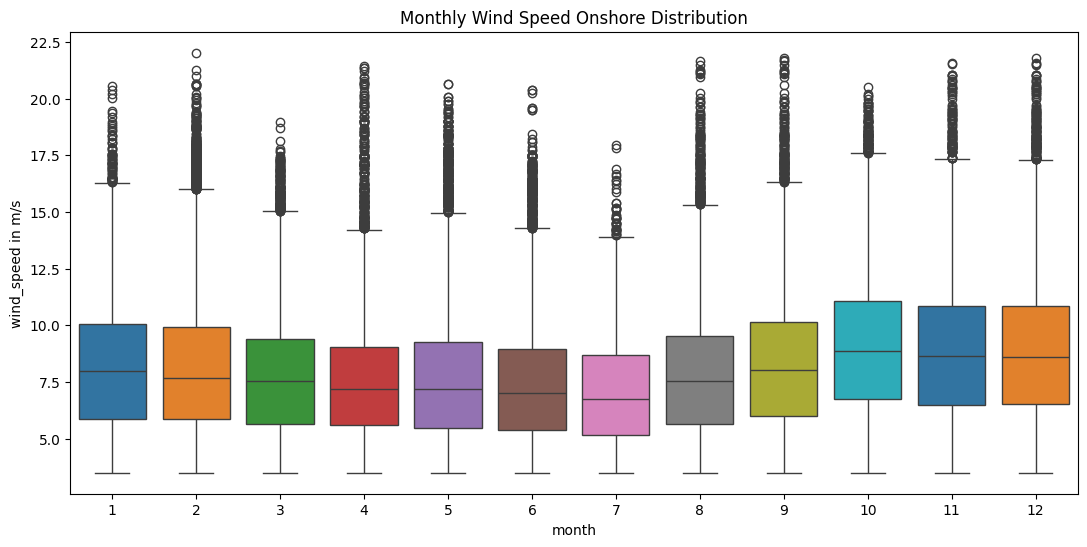

In [21]:
# Plotar o boxplot
plt.figure(figsize=(13, 6))
sns.boxplot(x="month", 
            y="wind_speed", 
            data=windfarm_Onshore, 
            hue="month", 
            palette="tab10", 
            legend=False)

plt.xlabel('month')
plt.ylabel('wind_speed in m/s')
plt.title('Monthly Wind Speed Onshore Distribution')
plt.show()

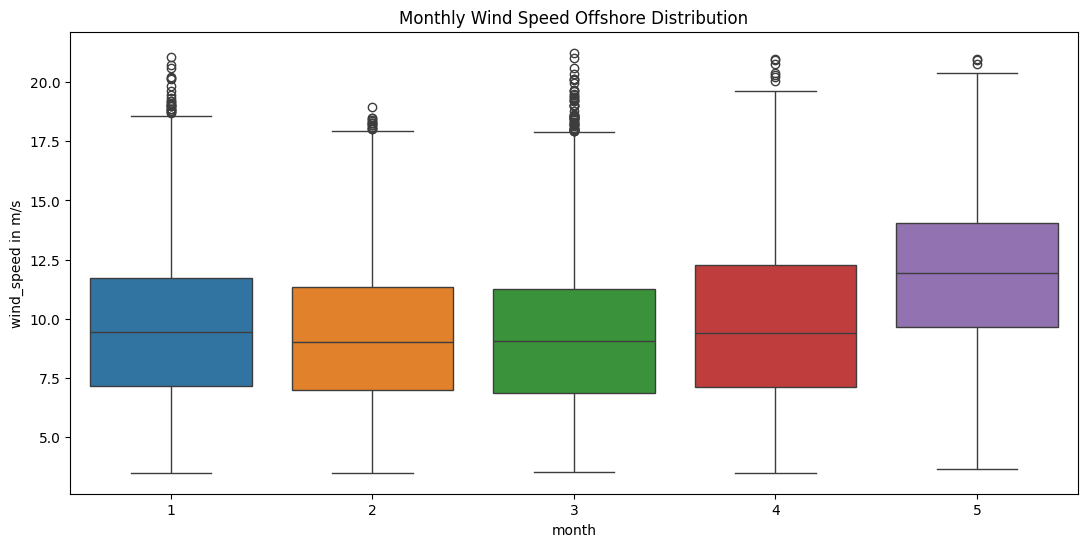

In [22]:
# Plotar o boxplot
plt.figure(figsize=(13, 6))
sns.boxplot(x="month", 
            y="wind_speed", 
            data=windfarm_Offshore, 
            hue="month", 
            palette="tab10", 
            legend=False)

plt.xlabel('month')
plt.ylabel('wind_speed in m/s')
plt.title('Monthly Wind Speed Offshore Distribution')
plt.show()

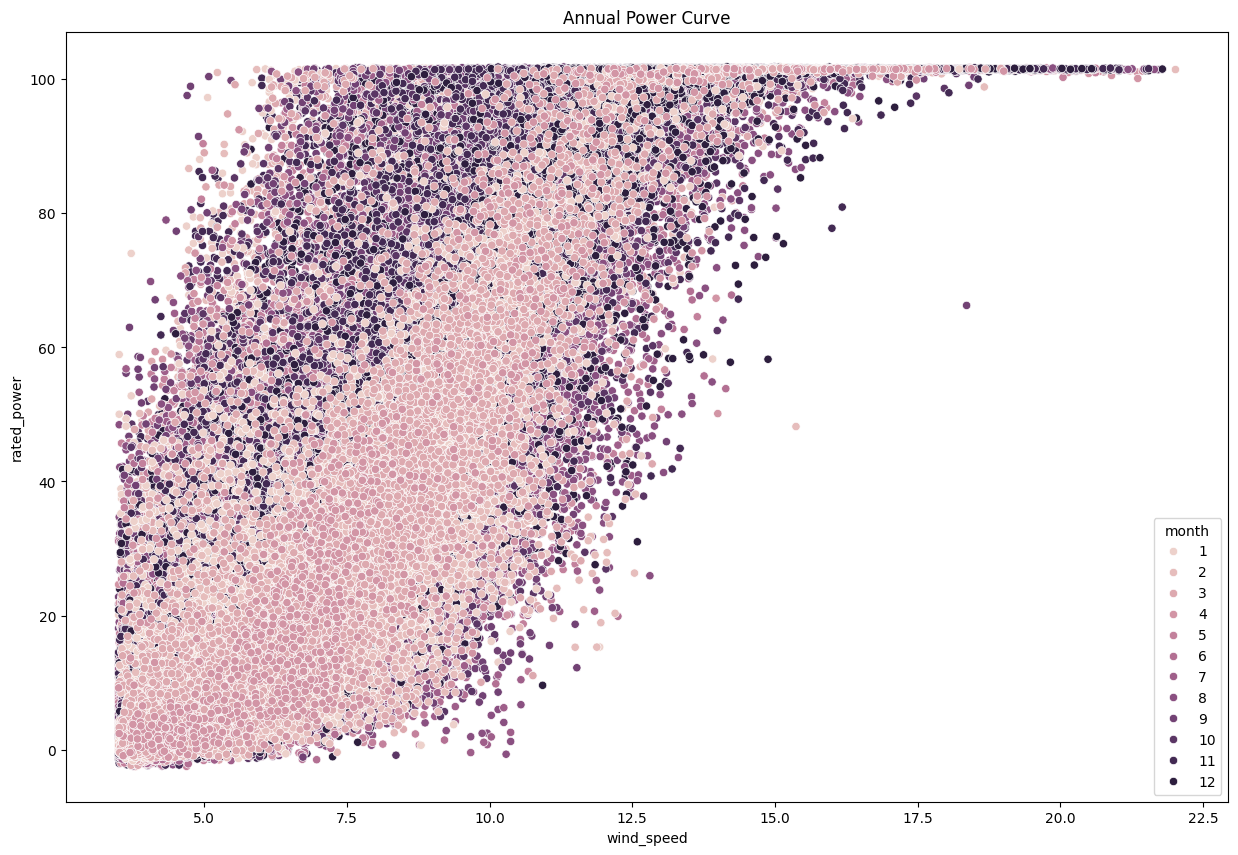

In [23]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = windfarm_Onshore['wind_speed'], 
                y = windfarm_Onshore['rated_power'], 
                hue = windfarm_Onshore['month'], 
                legend="full")
plt.title("Annual Power Curve")
plt.show()

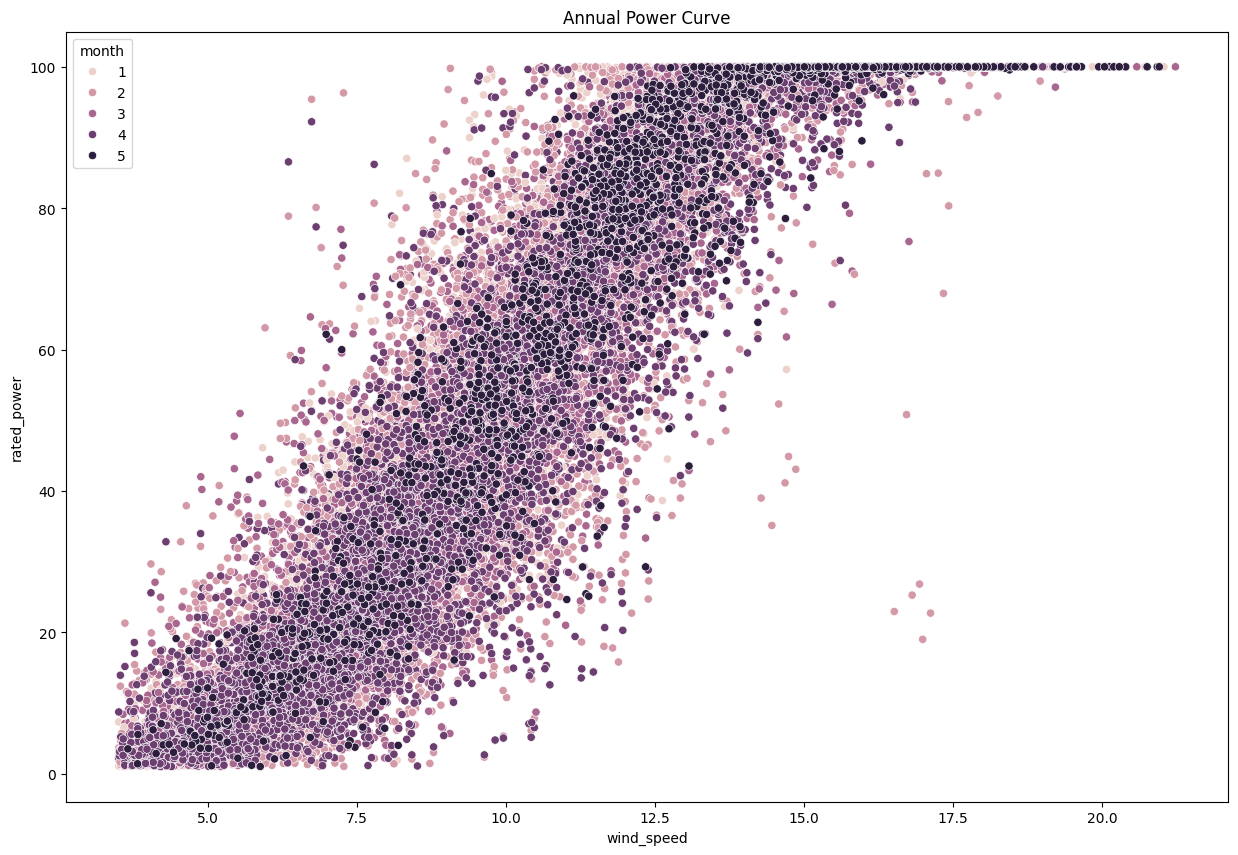

In [24]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = windfarm_Offshore['wind_speed'], 
                y = windfarm_Offshore['rated_power'], 
                hue = windfarm_Offshore['month'], 
                legend="full")
plt.title("Annual Power Curve")
plt.show()

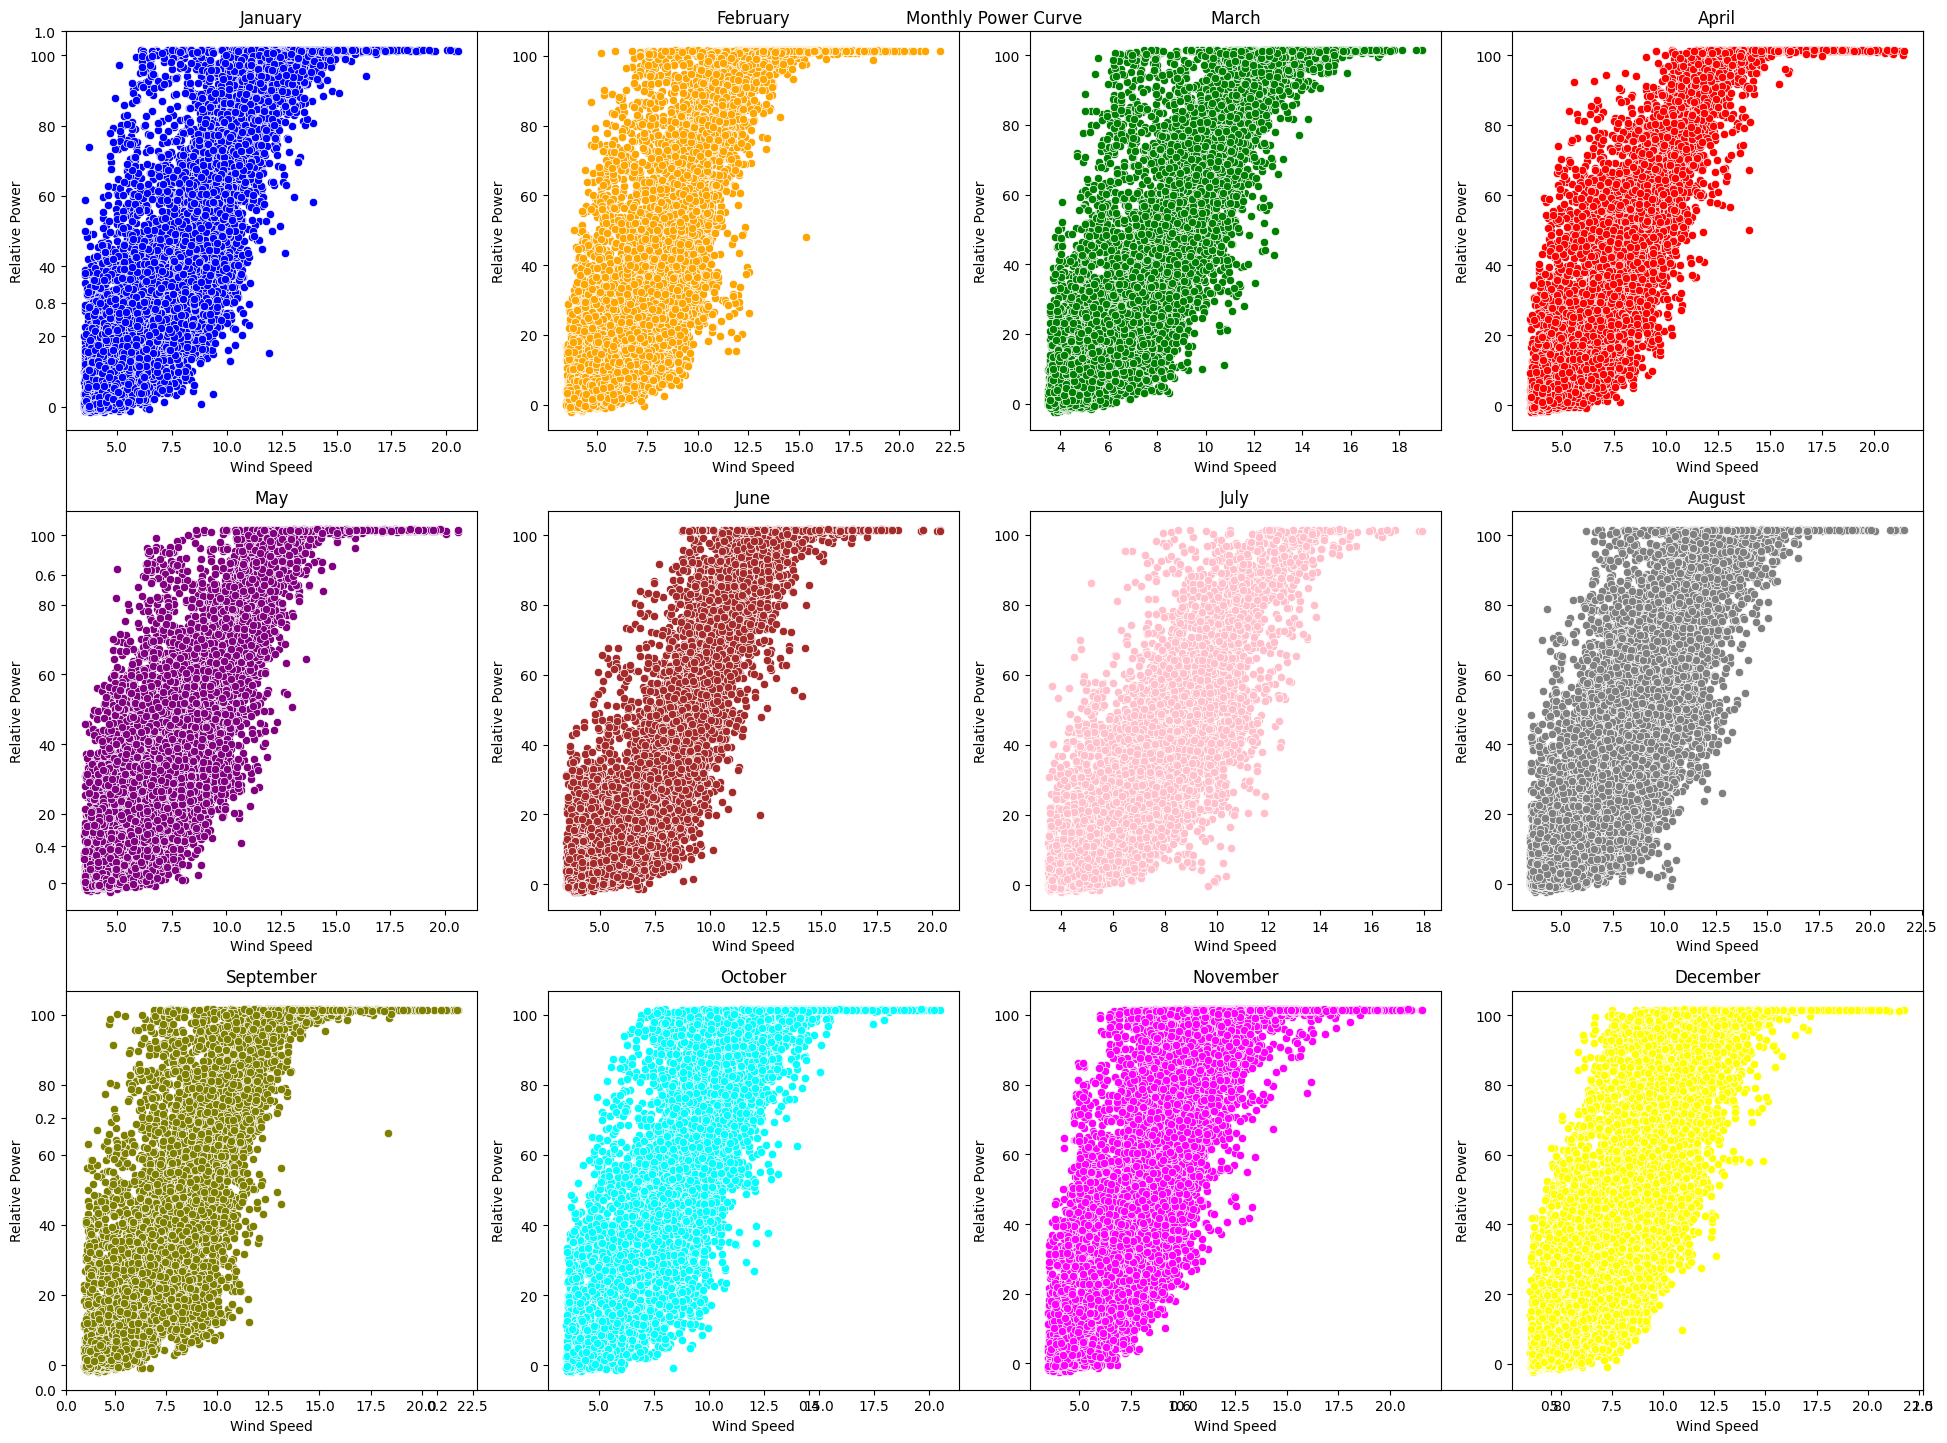

In [25]:
# Definindo um dicionário de cores para cada mês
colors = {1: 'blue', 2: 'orange', 3: 'green', 4: 'red', 5: 'purple', 6: 'brown', 
          7: 'pink', 8: 'gray', 9: 'olive', 10: 'cyan', 11: 'magenta', 12: 'yellow'}

plt.figure(figsize=(20, 15))
plt.title("Monthly Power Curve")
for i in range(1, 13):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=windfarm_Onshore.wind_speed[windfarm_Onshore.month == i], 
                    y=windfarm_Onshore.rated_power[windfarm_Onshore.month == i], 
                    color=colors[i])
    plt.xlabel("Wind Speed")
    plt.ylabel("Relative Power")
    plt.title(calendar.month_name[i])

plt.tight_layout()
plt.show()

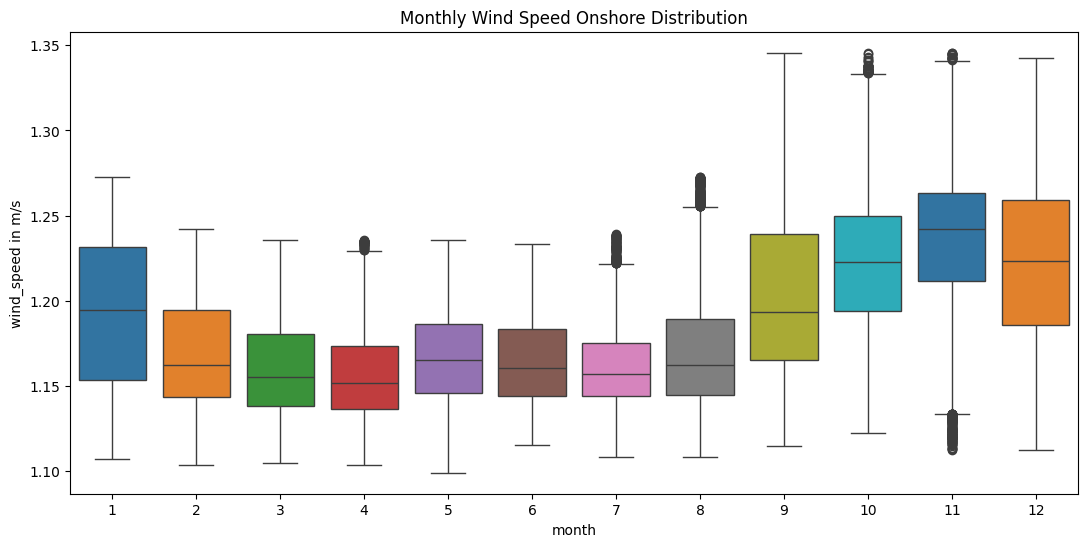

In [26]:
# Plotar o boxplot
plt.figure(figsize=(13, 6))
sns.boxplot(x="month", 
            y="air_density", 
            data=windfarm_Onshore, 
            hue="month", 
            palette="tab10", 
            legend=False)

plt.xlabel('month')
plt.ylabel('wind_speed in m/s')
plt.title('Monthly Wind Speed Onshore Distribution')
plt.show()

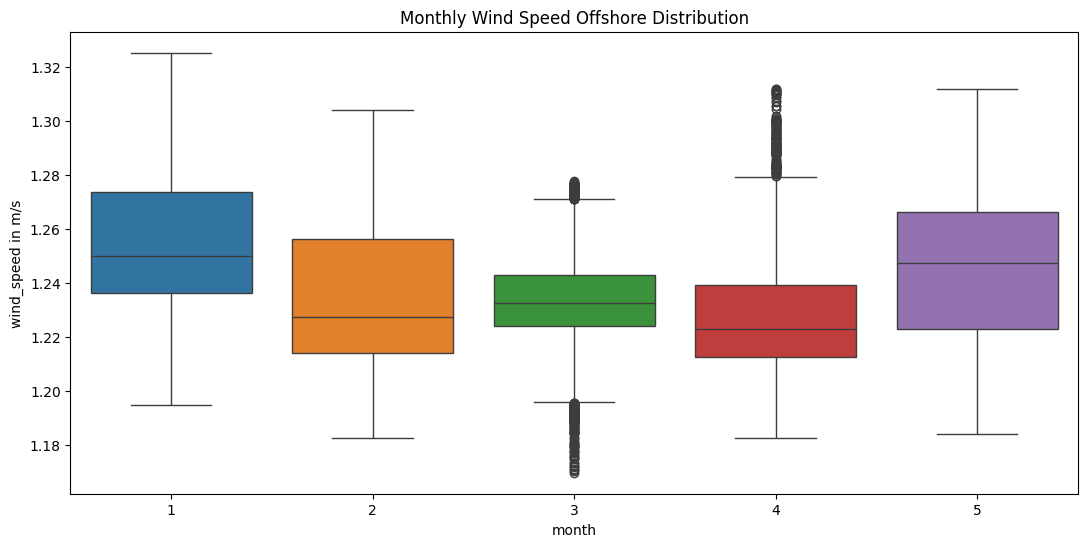

In [27]:
# Plotar o boxplot
plt.figure(figsize=(13, 6))
sns.boxplot(x="month", 
            y="air_density", 
            data=windfarm_Offshore, 
            hue="month", 
            palette="tab10", 
            legend=False)

plt.xlabel('month')
plt.ylabel('wind_speed in m/s')
plt.title('Monthly Wind Speed Offshore Distribution')
plt.show()

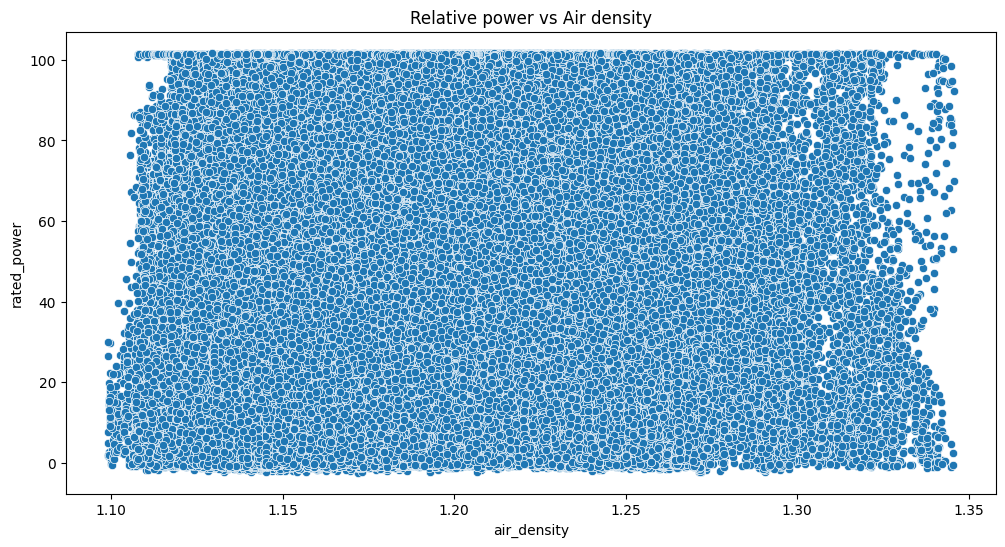

In [28]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = windfarm_Onshore['air_density'], y = windfarm_Onshore['rated_power'])
plt.title("Relative power vs Air density");

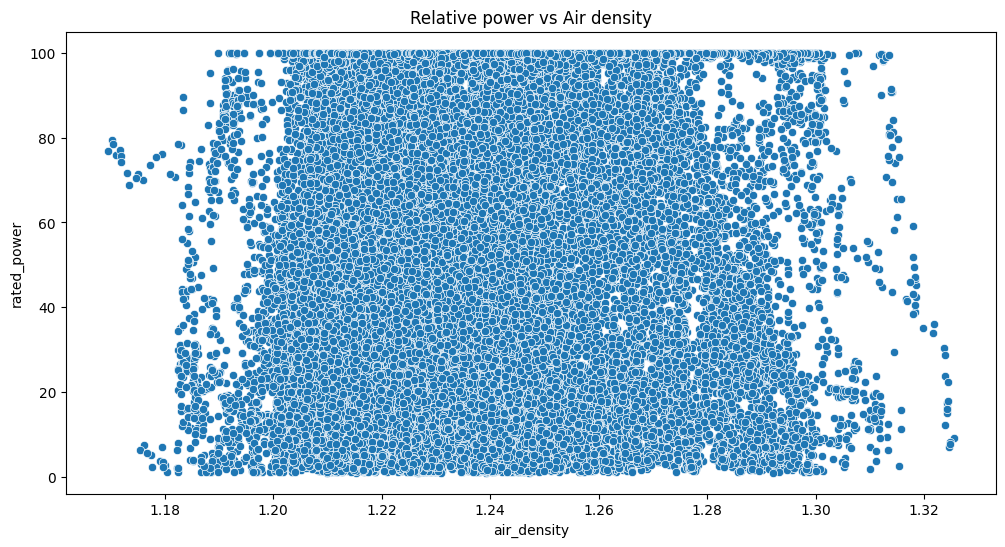

In [29]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = windfarm_Offshore['air_density'], y = windfarm_Offshore['rated_power'])
plt.title("Relative power vs Air density");

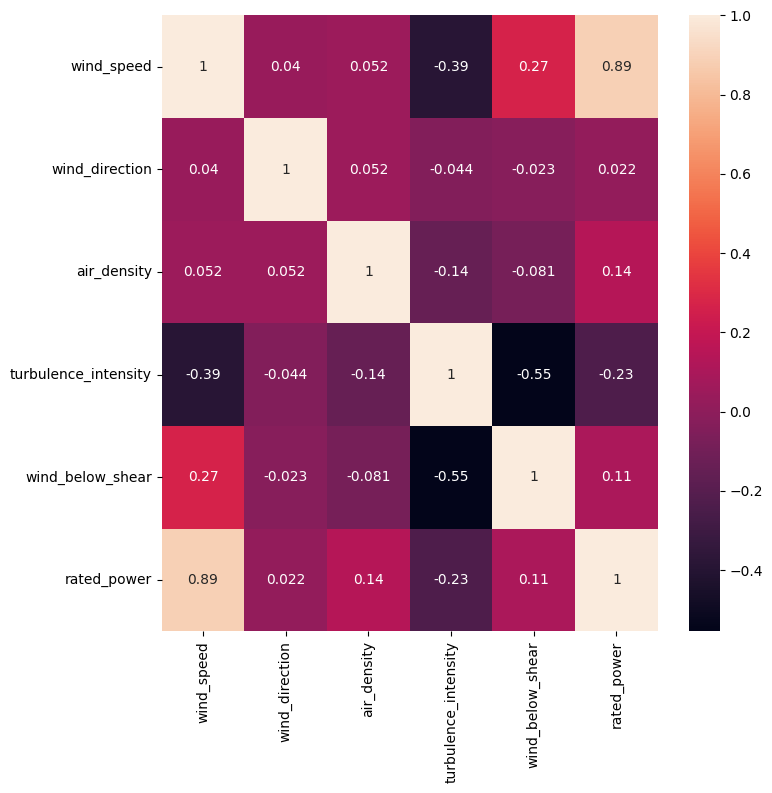

In [30]:
df_corr = windfarm_Onshore.drop(['date_time', 'month'], axis=1).corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True)
plt.yticks(rotation=0);
plt.show()

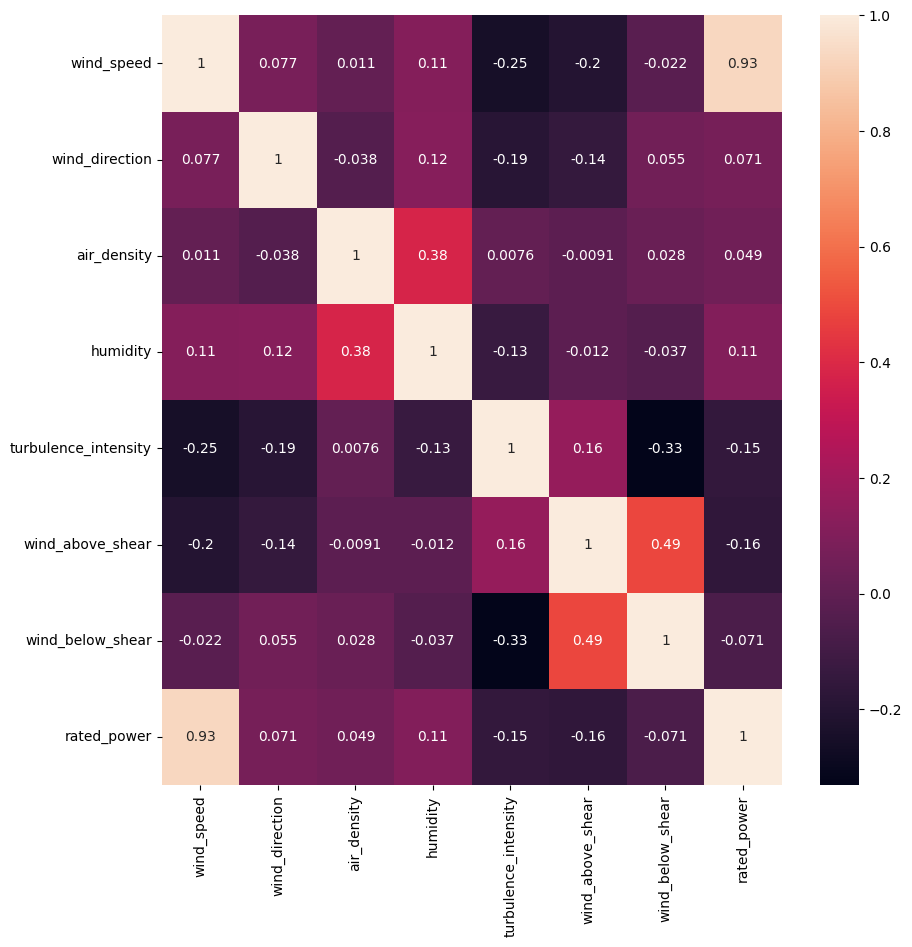

In [31]:
df_corr = windfarm_Offshore.drop(['date_time', 'month'], axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True)
plt.yticks(rotation=0);
plt.show()

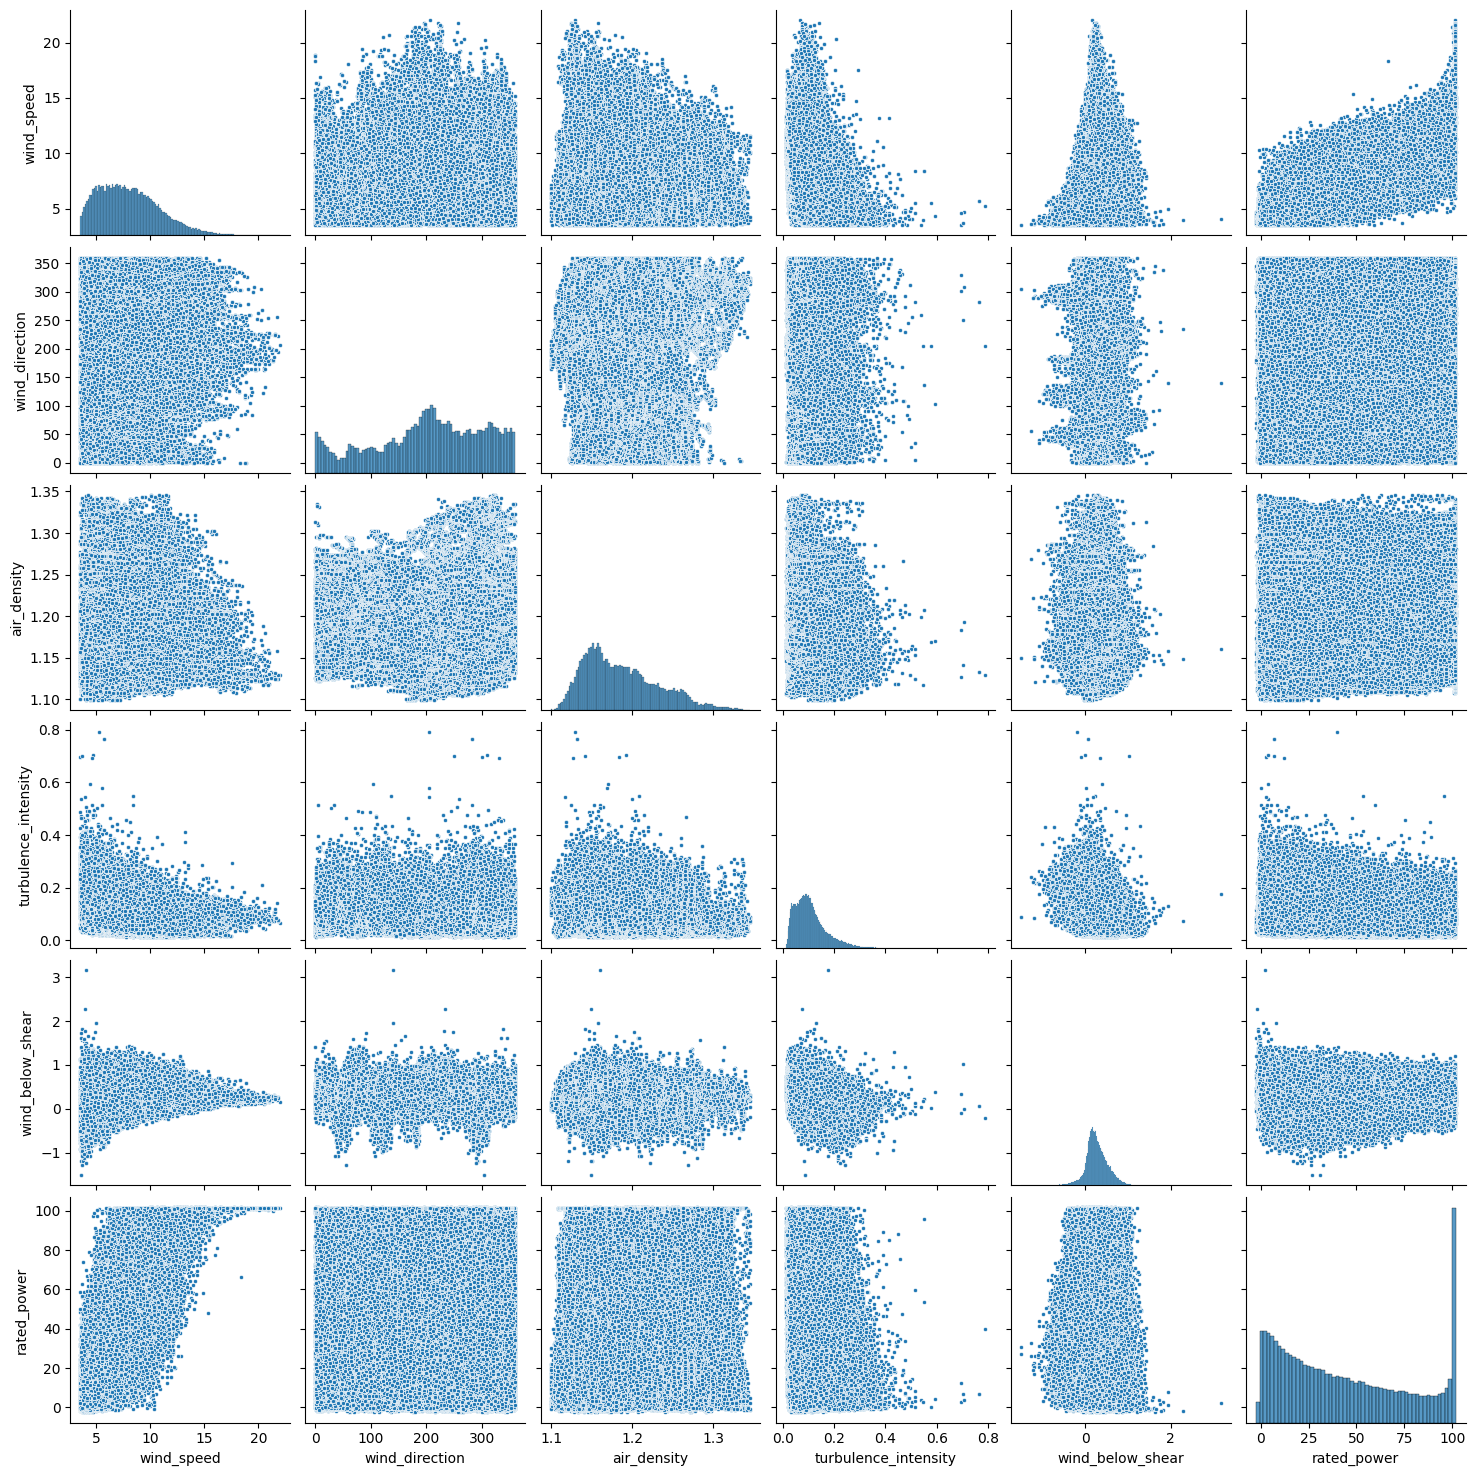

In [32]:
sns.pairplot(windfarm_Onshore.drop(['date_time', 'month'], axis=1), markers='.')

In [33]:
# feats = ["wind_speed", "air_density", "turbulence_intensity", "wind_below_shear", "month"]
feats = ['wind_speed', 'wind_direction', 'air_density', 'turbulence_intensity', 'wind_below_shear', 'month']


In [34]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

models = [RandomForestRegressor(random_state=0, n_estimators=100),
          ExtraTreesRegressor(random_state=0, n_estimators=100)]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(windfarm_Onshore[feats], windfarm_Onshore['rated_power'], test_size=0.33, random_state=42)

In [36]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
rfr = model.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [37]:
mean_absolute_percentage_error(y_test, y_pred, sample_weight=y_test)

0.1532132230937146

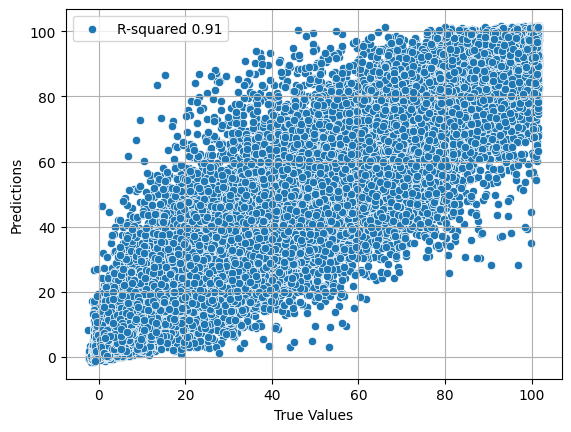

In [38]:
R_squared = r2_score(y_test, y_pred)

# plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, label="R-squared %.2f" % R_squared)
plt.grid()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [39]:
def cross_val(model, n_folds, X_train, y_train):
    kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    predictions = cross_val_predict(model, X_train, y_train, cv=kfold, n_jobs=-1)
    
    r2_scores = r2_score(y_train, predictions)
    rmse_scores = np.sqrt(mean_squared_error(y_train, predictions))
    mae_scores = mean_absolute_error(y_train, predictions)
    mape_scores = mean_absolute_percentage_error(y_train, predictions) * 100
    WMAPE = mean_absolute_percentage_error(y_train, predictions, sample_weight=y_train)
    
    benchmark_regression = []
    benchmark_regression.append({'R2 (%)': round(np.mean(r2_scores) * 100, 2),
                                'RMSE ($)': round(np.mean(rmse_scores), 2),
                                'MAE': round(np.mean(mae_scores), 2),
                                'MAPE': round(np.mean(mape_scores), 2),
                                'WMAPE' : round(np.mean(WMAPE), 2)})
    return pd.DataFrame(benchmark_regression)

In [40]:
score = cross_val(rfr, 5, X_train, y_train)
score

R2 (%)  RMSE ($)   MAE          MAPE  WMAPE
0   90.88      9.85  6.85  1.202984e+14   0.15

In [41]:
def poly_feature(degree, X_train, X_test, y_train):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    
    lm_poly = model.fit(X_train_poly, y_train)
    
    predictions = lm_poly.predict(poly_features.fit_transform(X_test))
    
    return predictions

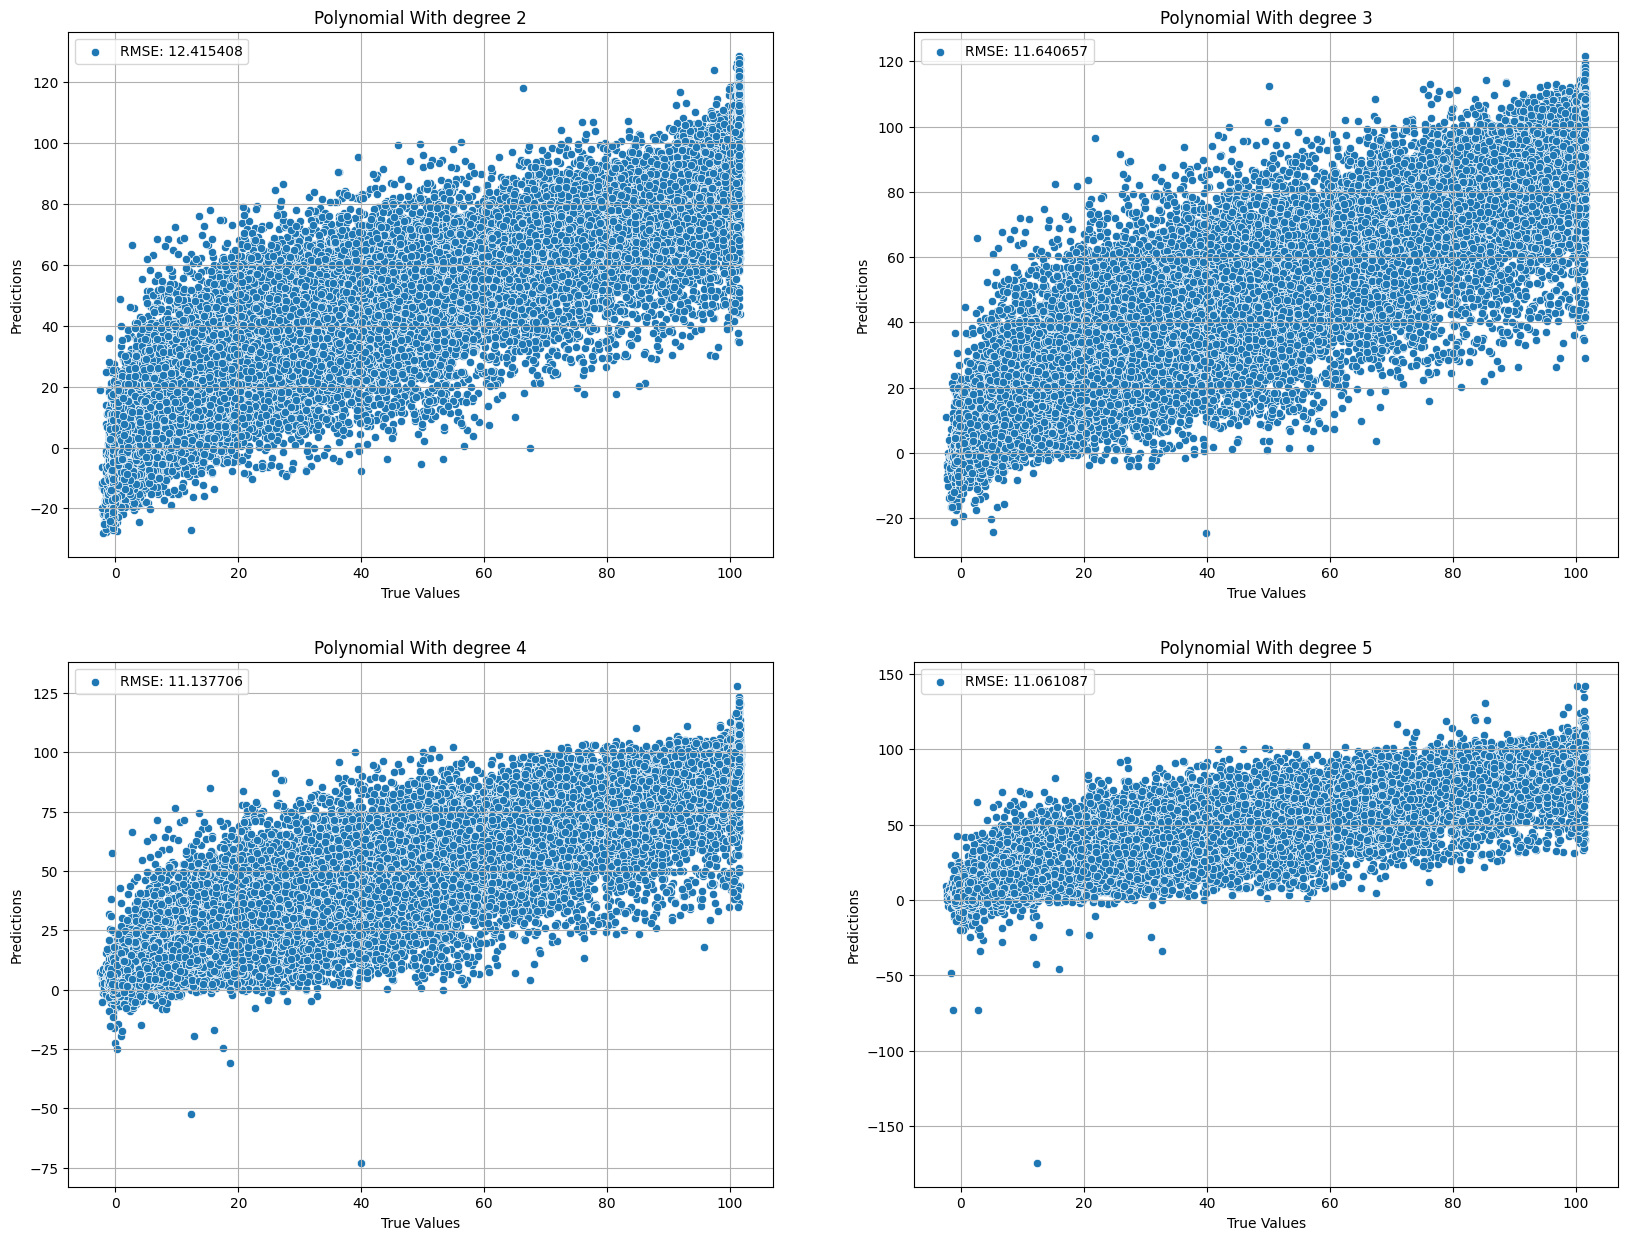

In [42]:
plt.figure(figsize=(20,15))

for i in range(2,6):
    plt.subplot(2,2,i-1).set_title('Polynomial With degree {}'.format(i))
    predictions = poly_feature(i, X_train, X_test, y_train)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    sns.scatterplot(x = y_test, y = predictions, label = "RMSE: %f" %(rmse))
    plt.grid()
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

In [43]:
benchmark_regression = []
for i in range(2,9):

    predictions = poly_feature(i, X_train, X_test, y_train)
    r2_scores = r2_score(y_test, predictions)
    rmse_scores = np.sqrt(mean_squared_error(y_test, predictions))
    mae_scores = mean_absolute_error(y_test, predictions)
    mape_scores = mean_absolute_percentage_error(y_test, predictions) * 100
    WMAPE = mean_absolute_percentage_error(y_test, predictions, sample_weight=y_test) * 100
    male = mean_squared_log_error(np.abs(y_test), np.abs(predictions)) * 100

    benchmark_regression.append({'degree' : i,
                                'R2 (%)': round(np.mean(r2_scores) * 100, 2),
                                'RMSE ($)': round(np.mean(rmse_scores), 2),
                                'MAE': round(np.mean(mae_scores), 2),
                                'MAPE': round(np.mean(mape_scores), 2),
                                'WMAPE' : round(np.mean(WMAPE), 2),
                                'male (%)' : round(np.mean(male), 2)})
benchmark_regression = pd.DataFrame(benchmark_regression)
benchmark_regression

degree  R2 (%)  RMSE ($)    MAE          MAPE  WMAPE  male (%)
0       2   85.57     12.42   9.34  3.803166e+14  20.60     32.67
1       3   87.31     11.64   8.39  2.309047e+14  18.78     23.95
2       4   88.38     11.14   7.83  2.531638e+14  17.48     22.43
3       5   88.54     11.06   7.86  3.035882e+14  17.55     23.18
4       6   89.08     10.80   7.59  2.896286e+14  16.96     21.18
5       7   88.85     10.91   7.78  2.883187e+14  17.32     23.14
6       8   80.90     14.28  10.35  6.313972e+14  22.84     36.96

In [44]:
from numba import njit

@njit
def diff(x, lag):
    x2 = np.full_like(x, np.nan)
    x2[lag:] = x[lag:] - x[:-lag]
    return x2

In [45]:
windfarm_Onshore['wind_speed'] = diff(windfarm_Onshore['wind_speed'], 5)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at /tmp/ipykernel_178935/4114895118.py (3)[0m
[1m
File "../../../../tmp/ipykernel_178935/4114895118.py", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'pandas.core.series.Series'>[0m
